In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [2]:
#df=pd.read_clipboard()
#df.to_csv("mortgage.csv")

In [2]:
# Importing the dataset
df=pd.read_csv("mortgage.csv")
#del df['Unnamed: 0.1']
#del df['Unnamed: 0']
df.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,13.34,94.960,12.85,12.11,12.10,10.75,10.52,1130.9,105.6,257.1,14.04,383.1,274.4,868.1,193.0,12.02
1,13.30,94.227,12.90,11.94,11.72,10.69,10.54,1133.6,105.9,258.8,13.94,385.1,276.1,869.8,192.5,11.90
2,13.21,94.469,12.87,11.90,11.91,10.78,10.64,1136.7,106.0,258.1,13.91,384.4,275.3,872.4,191.6,11.92
3,13.29,94.685,12.89,12.19,12.17,10.96,10.87,1137.2,106.1,260.2,13.77,387.1,277.8,872.0,193.6,12.11
4,13.16,94.939,12.85,12.04,12.15,11.24,11.15,1138.3,106.5,262.8,13.54,390.3,280.5,873.0,190.5,12.36


In [3]:
# Column Names

df.columns=['1year Treasury Constant Maturity rate  ',
'3Month Treasury Bill Rate- Auction Average',
'3Month Treasury Bill Rate-Secondary Market',
'3Year Treasury Constant Maturity Rate  ',
'5Year Treasury Constant Maturity Rate  ',
' Bank Credit of All Commercial Banks ',
' Currency Component of Money Stock ',
' Demand Deposits at Commercial Banks ',
' Effective Federal Funds Rate ',
' M1 Money Stock ',
' Total Checkable Deposits ',
' Total Loans and Leases of All Commercial Banks ',
' Total Savings Deposits ',
' Trade Weighted Exchange Index Major Currencies ',
'1Month CD Rate  ',
'30Year Conventional Mortgage Rate '
]

In [4]:
# Renaming Columns
df.columns=['1MR','Auction Average','Secondary Market','3YMR','5YMR','Bank Credit','CCStockMarket','DD','FederalFunds','M1Mstock','ToatlCD',
            'LoansAndLeases','TotalSavings','TWEIMC','1MCD','30YCMR']

In [5]:
# First few rows of the dataset
df.head()

,1MR,Auction Average,Secondary Market,3YMR,5YMR,Bank Credit,CCStockMarket,DD,FederalFunds,M1Mstock,ToatlCD,LoansAndLeases,TotalSavings,TWEIMC,1MCD,30YCMR
0,13.34,94.960,12.85,12.11,12.10,10.75,10.52,1130.9,105.6,257.1,14.04,383.1,274.4,868.1,193.0,12.02
1,13.30,94.227,12.90,11.94,11.72,10.69,10.54,1133.6,105.9,258.8,13.94,385.1,276.1,869.8,192.5,11.90
2,13.21,94.469,12.87,11.90,11.91,10.78,10.64,1136.7,106.0,258.1,13.91,384.4,275.3,872.4,191.6,11.92
3,13.29,94.685,12.89,12.19,12.17,10.96,10.87,1137.2,106.1,260.2,13.77,387.1,277.8,872.0,193.6,12.11
4,13.16,94.939,12.85,12.04,12.15,11.24,11.15,1138.3,106.5,262.8,13.54,390.3,280.5,873.0,190.5,12.36


In [6]:
# Dataset shape and column data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1049 entries, 0 to 1048
Data columns (total 16 columns):
1MR                 1049 non-null float64
Auction Average     1049 non-null float64
Secondary Market    1049 non-null float64
3YMR                1049 non-null float64
5YMR                1049 non-null float64
Bank Credit         1049 non-null float64
CCStockMarket       1049 non-null float64
DD                  1049 non-null float64
FederalFunds        1049 non-null float64
M1Mstock            1049 non-null float64
ToatlCD             1049 non-null float64
LoansAndLeases      1049 non-null float64
TotalSavings        1049 non-null float64
TWEIMC              1049 non-null float64
1MCD                1049 non-null float64
30YCMR              1049 non-null float64
dtypes: float64(16)
memory usage: 131.2 KB


In [7]:
# Some statistics about the variables.
df.describe()

,1MR,Auction Average,Secondary Market,3YMR,5YMR,Bank Credit,CCStockMarket,DD,FederalFunds,M1Mstock,ToatlCD,LoansAndLeases,TotalSavings,TWEIMC,1MCD,30YCMR
count,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000
mean,7.521945,97.353633,10.400848,6.851220,6.829342,8.117378,8.359104,2639.677312,256.847664,308.115443,7.549495,813.330410,549.687417,1959.121830,954.669399,7.543937
std,3.377216,14.471441,2.958872,2.954287,2.942284,2.883880,2.766248,1010.520574,114.575372,59.805094,3.538662,258.688545,157.072519,720.531058,372.292523,3.105787
min,3.020000,77.055000,6.490000,2.670000,2.690000,4.090000,4.170000,1130.900000,105.600000,225.800000,2.860000,381.100000,269.900000,868.100000,175.600000,3.020000
25%,5.370000,86.799000,7.880000,4.990000,4.980000,5.890000,6.140000,1746.300000,156.800000,258.200000,5.300000,555.300000,394.700000,1339.600000,721.000000,5.450000
50%,6.610000,92.526000,9.900000,5.810000,5.770000,7.440000,7.760000,2616.100000,224.400000,287.700000,6.640000,796.000000,567.400000,2023.900000,947.900000,6.710000
75%,8.820000,104.736000,12.800000,8.140000,8.090000,9.690000,9.980000,3350.200000,357.900000,377.100000,8.980000,1080.500000,658.800000,2407.500000,1197.400000,9.030000
max,20.760000,142.645000,18.630000,16.750000,16.760000,16.470000,16.130000,4809.200000,533.000000,412.100000,20.060000,1154.100000,803.400000,3550.300000,1758.100000,17.150000


In [85]:
# Separating Explanatory variables  and response variable
dfX=df.iloc[:,:-1]
dfy=df['30YCMR']

In [183]:
# Hypothesis
print ' HYPOTHESIS\n==========================\n'
print'H0:There no linear correlation between 1 year Mortgage rate and the 30 y mortgage rate '
print'HA: There is a  linear correlation between 1 year Mortgage rate and the 30 y mortgage rate '

 HYPOTHESIS

H0:There no linear correlation between 1 year Mortgage rate and the 30 y mortgage rate 
HA: There is a  linear correlation between 1 year Mortgage rate and the 30 y mortgage rate 


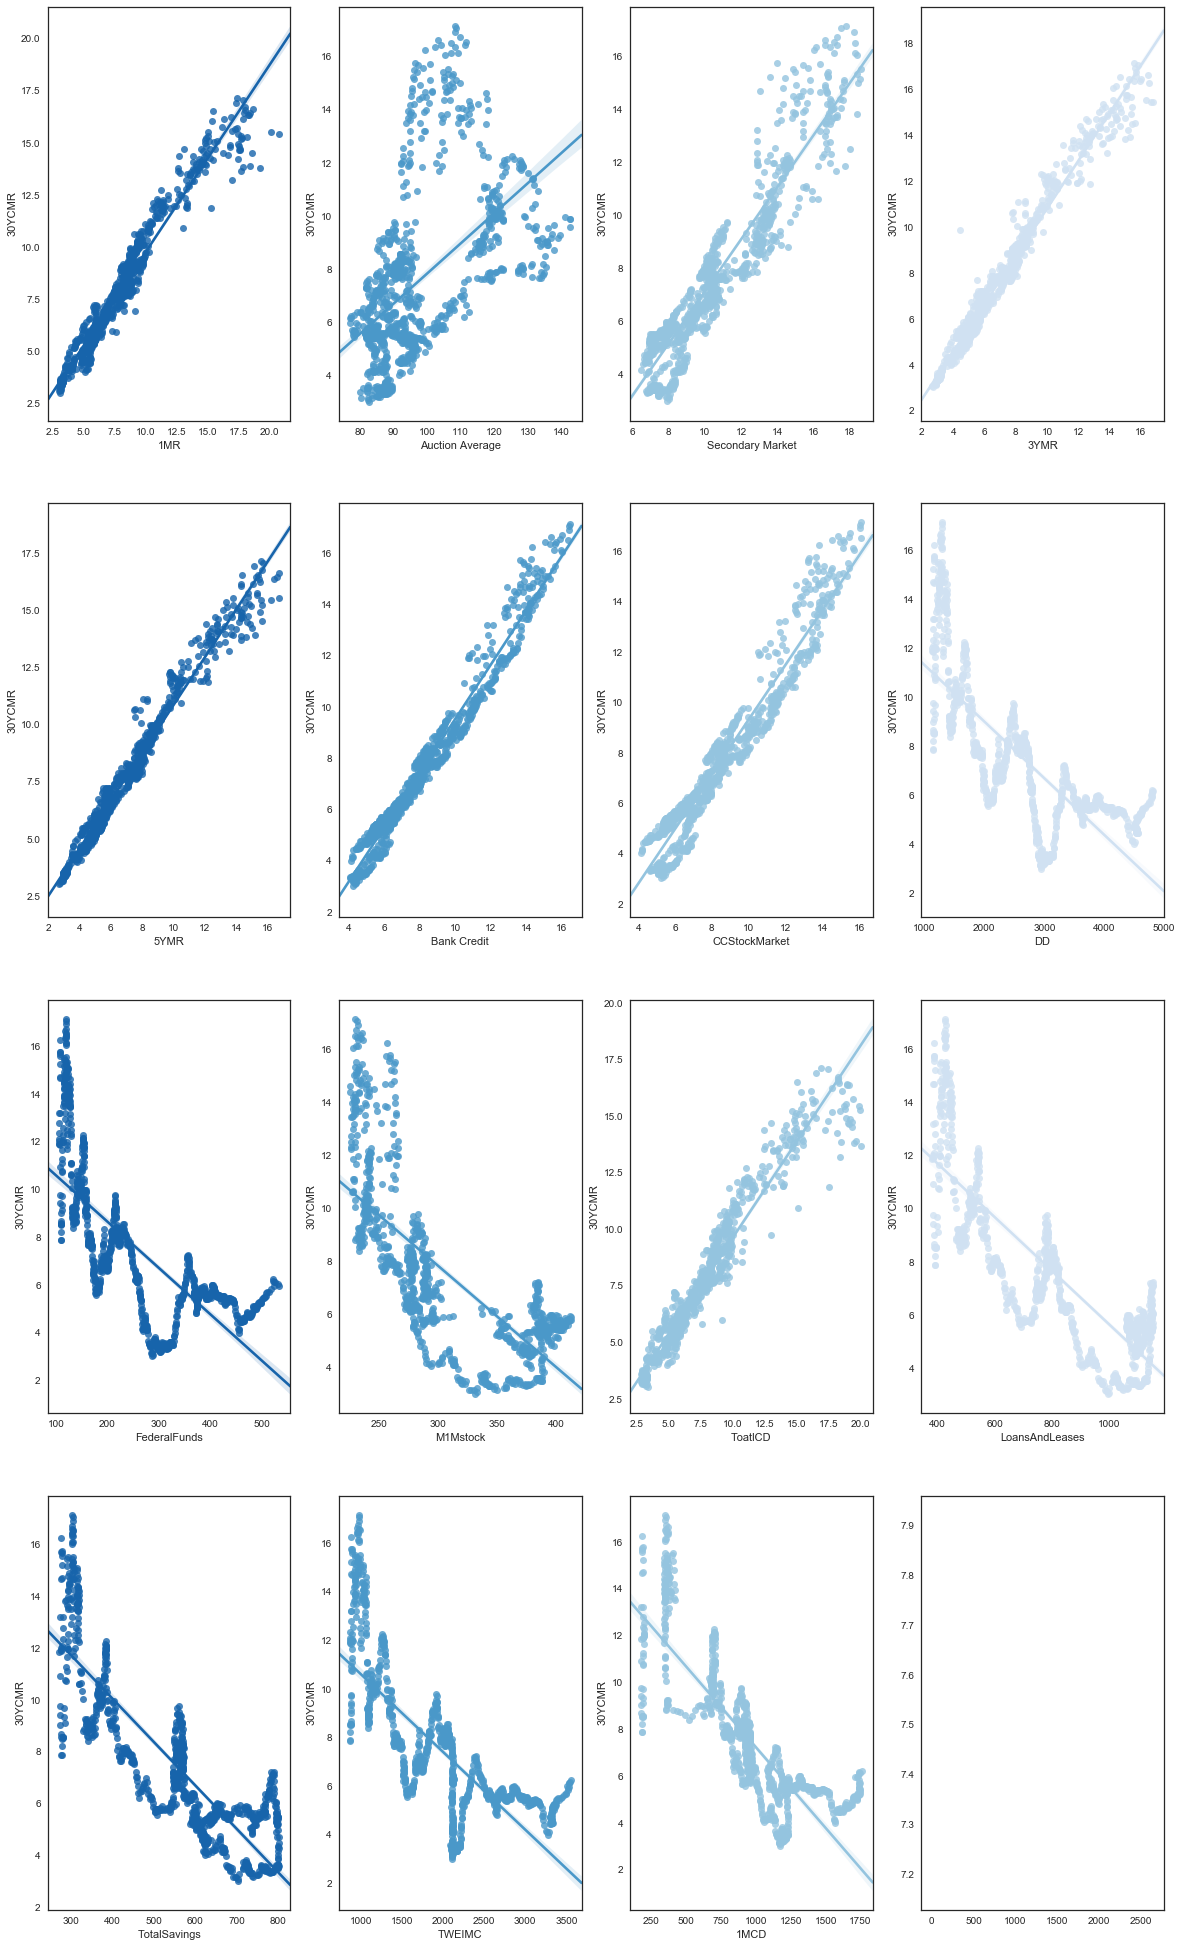

In [184]:
# Visualizing correlation between all the explanatory variables and the reponse variable 30 Year Conventional Mortgage Rate

f, ax = plt.subplots(figsize=(20, 35),ncols=4,nrows=4)
#import itertools
#l=np.array(list(itertools.permutations(range(4)))
l1=[0, 0, 0,0,1, 1, 1,1, 2, 2, 2,2, 3,3,3]
l2=[0, 1, 2,3,0, 1, 2,3, 0, 1, 2,3, 0, 1,2]


for i, col in enumerate(dfX.columns):

        sns.regplot(x=col, y='30YCMR', data=df, ax=ax[l1[i], l2[i]])


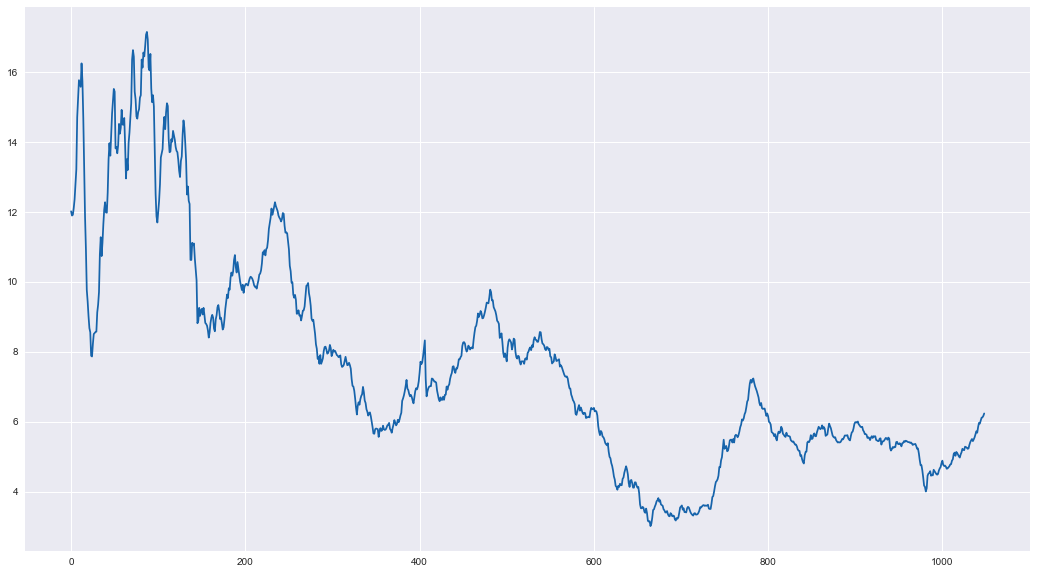

In [185]:
# Visualizing how the 30 y Conventional Mortgage Rate has moved
plt.figure(figsize=(18,10))
sns.set_style("darkgrid")
plt.plot(dfy)


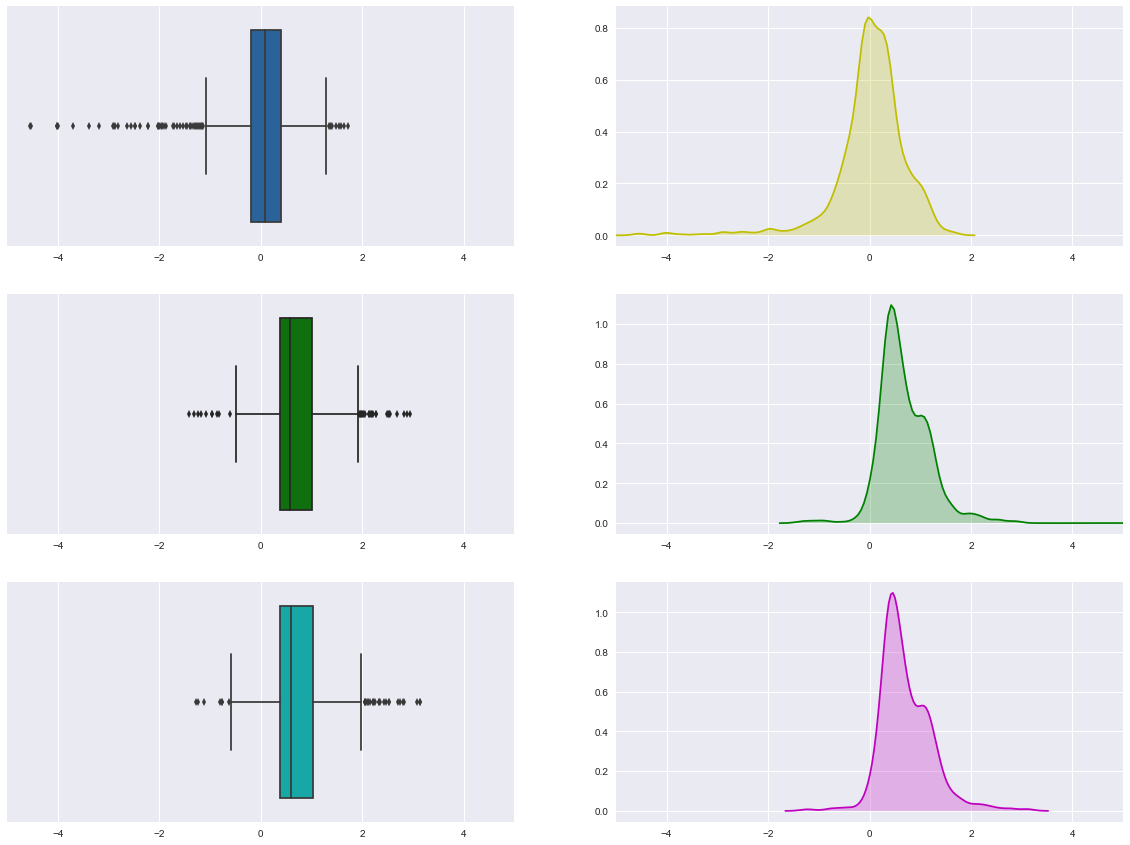

In [186]:
# Overview of the spread between the Treasury Constant Maturity rates and the 30 Year Conventional Mortgage Rate
f, ax = plt.subplots(figsize=(20, 15),ncols=2,nrows=3)
spread=dfy-dfX['1MR']
spread2=dfy-dfX['3YMR']
spread3=dfy-dfX['5YMR']


#plt.plot(spread)
sns.boxplot(x=spread,ax=ax[0,0])
sns.kdeplot(spread, shade=True, color="y",ax=ax[0,1])
sns.boxplot(x=spread2,ax=ax[1,0],color='g')
sns.kdeplot(spread2, shade=True, color="g", ax=ax[1,1])
sns.boxplot(x=spread3,ax=ax[2,0],color='c')
sns.kdeplot(spread3, shade=True, color="m", ax=ax[2,1])
for ax in ax.reshape(-1):
    ax.set_xlim(-5,5)

In [221]:
# Creating the best model for hypothesis testing and prediction

# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dfX, dfy, test_size = 0.2, random_state = 0)

In [222]:
# Fitting the object to the training set
import statsmodels.formula.api as sm
regressor_OLS=sm.OLS(endog=y_train,exog=X_train).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 30YCMR   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.803e+05
Date:                Thu, 02 Nov 2017   Prob (F-statistic):               0.00
Time:                        16:42:15   Log-Likelihood:                 616.19
No. Observations:                 839   AIC:                            -1202.
Df Residuals:                     824   BIC:                            -1131.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
1MR                  0.0347      0.017      2.020      0.044       0.001       0.068
Auction Average     -0.0039      0.001     -7.147      0.000      -0.005      -0.003
Secondary Market    -0.0286      0.009     -3.259      0.001      -0.046      -0.011
3YMR                 0.0714      0.019      3.719      0.000       0.034       0.109
5YMR                 0.2773      0.023     12.110      0.000       0.232       0.322
Bank Credit          1.3938      0.032     44.019      0.000       1.332       1.456
CCStockMarket       -0.6871      0.031    -22.236      0.000      -0.748      -0.626
DD                   0.0015      0.000      5.771      0.000       0.001       0.002
FederalFunds         0.0058      0.006      1.026      0.305      -0.005       0.017
M1Mstock             0.0018      0.000      7.266      0.000       0.001       0.002
ToatlCD             -0.0157      0.013     -1.197      0.232      -0.041       0.010
LoansAndLeases      -0.0094      0.006     -1.660      0.097      -0.021       0.002
TotalSavings         0.0087      0.006      1.533      0.126      -0.002       0.020
TWEIMC              -0.0014      0.000     -6.073      0.000      -0.002      -0.001
1MCD                -0.0003   5.68e-05     -4.480      0.000      -0.000      -0.000
==============================================================================
Omnibus:                      223.693   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2379.093
Skew:                           0.887   Prob(JB):                         0.00
Kurtosis:                      11.057   Cond. No.                     4.08e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.08e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [231]:
# Removing the FederalFunds rate since its p value is 0.3, way greater than 0.05

X_train=X_train.iloc[:,[0,1,2,3,4,5,6,7,9,10,11,12,13,14]]
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 839 entries, 403 to 684
Data columns (total 14 columns):
1MR                 839 non-null float64
Auction Average     839 non-null float64
Secondary Market    839 non-null float64
3YMR                839 non-null float64
5YMR                839 non-null float64
Bank Credit         839 non-null float64
CCStockMarket       839 non-null float64
DD                  839 non-null float64
M1Mstock            839 non-null float64
ToatlCD             839 non-null float64
LoansAndLeases      839 non-null float64
TotalSavings        839 non-null float64
TWEIMC              839 non-null float64
1MCD                839 non-null float64
dtypes: float64(14)
memory usage: 98.3 KB


In [233]:
# Fitting the model again with the FederalFund variable

regressor_OLS2=sm.OLS(endog=y_train,exog=X_train).fit()
regressor_OLS2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 30YCMR   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.003e+05
Date:                Thu, 02 Nov 2017   Prob (F-statistic):               0.00
Time:                        16:45:46   Log-Likelihood:                 615.65
No. Observations:                 839   AIC:                            -1203.
Df Residuals:                     825   BIC:                            -1137.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
1MR                  0.0356      0.017      2.076      0.038       0.002       0.069
Auction Average     -0.0039      0.001     -7.131      0.000      -0.005      -0.003
Secondary Market    -0.0285      0.009     -3.242      0.001      -0.046      -0.011
3YMR                 0.0711      0.019      3.703      0.000       0.033       0.109
5YMR                 0.2783      0.023     12.164      0.000       0.233       0.323
Bank Credit          1.3960      0.032     44.185      0.000       1.334       1.458
CCStockMarket       -0.6899      0.031    -22.412      0.000      -0.750      -0.629
DD                   0.0016      0.000      6.028      0.000       0.001       0.002
M1Mstock             0.0018      0.000      7.294      0.000       0.001       0.002
ToatlCD             -0.0171      0.013     -1.306      0.192      -0.043       0.009
LoansAndLeases      -0.0036      0.001     -4.775      0.000      -0.005      -0.002
TotalSavings         0.0029      0.001      4.199      0.000       0.002       0.004
TWEIMC              -0.0015      0.000     -6.471      0.000      -0.002      -0.001
1MCD                -0.0003   5.68e-05     -4.463      0.000      -0.000      -0.000
==============================================================================
Omnibus:                      227.875   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2437.796
Skew:                           0.908   Prob(JB):                         0.00
Kurtosis:                      11.151   Cond. No.                     4.06e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [234]:
# Removing the ToatlCD rate since its p value is 0.192
X_train=X_train.iloc[:,[0,1,2,3,4,5,6,7,10,11,12,13]]


# Fitting the model again with the FederalFund variable

regressor_OLS2=sm.OLS(endog=y_train,exog=X_train).fit()
regressor_OLS2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 30YCMR   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.293e+05
Date:                Thu, 02 Nov 2017   Prob (F-statistic):               0.00
Time:                        16:47:41   Log-Likelihood:                 588.74
No. Observations:                 839   AIC:                            -1153.
Df Residuals:                     827   BIC:                            -1097.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
1MR                  0.0289      0.011      2.518      0.012       0.006       0.051
Auction Average     -0.0020      0.000     -4.044      0.000      -0.003      -0.001
Secondary Market    -0.0236      0.009     -2.774      0.006      -0.040      -0.007
3YMR                 0.0741      0.020      3.749      0.000       0.035       0.113
5YMR                 0.2730      0.023     11.652      0.000       0.227       0.319
Bank Credit          1.4281      0.032     44.383      0.000       1.365       1.491
CCStockMarket       -0.7368      0.031    -23.805      0.000      -0.798      -0.676
DD                   0.0015      0.000      5.543      0.000       0.001       0.002
LoansAndLeases      -0.0023      0.001     -2.991      0.003      -0.004      -0.001
TotalSavings         0.0022      0.001      3.056      0.002       0.001       0.004
TWEIMC              -0.0015      0.000     -6.305      0.000      -0.002      -0.001
1MCD                -0.0003   5.62e-05     -6.138      0.000      -0.000      -0.000
==============================================================================
Omnibus:                      235.415   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2093.826
Skew:                           1.007   Prob(JB):                         0.00
Kurtosis:                      10.473   Cond. No.                     3.98e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.98e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [245]:
X_test=X_test.iloc[:,[0,1,2,3,4,5,6,7,10,11,12,13]]
# Making predictions with our test dataset
y_predict=regressor_OLS2.predict(X_test)

In [278]:
 df=pd.DataFrame(list(zip(y_test,y_predict,y_test-y_predict)), columns=['Y test', 'y predicted','Error'])

In [283]:
df.sort_values(by='Error',ascending=False).head(10)

,Y test,y predicted,Error
47,14.68,15.844356,-1.164356
176,15.24,16.430971,-1.190971
46,9.77,11.100619,-1.330619
34,11.90,13.234411,-1.334411
125,11.92,13.339228,-1.419228
68,13.21,14.673145,-1.463145
190,11.28,12.965064,-1.685064
83,12.51,14.331938,-1.821938
12,11.10,12.956900,-1.856900
160,14.50,16.383564,-1.883564


In [286]:
print'Conclusion\n==================\n We reject HO in favor of HA and conclude that there is a positive linear relationship between 1mr and 30 y mortgage rate'

Conclusion
 We reject HO in favor of HA and conclude that there is a positive linear relationship between 1mr and 30 y mortgage rate
